<a href="https://colab.research.google.com/github/vinitorrescruz/Projeto-Final-Harve-/blob/main/Colab/Vinicius_Torres_MMM_Project_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plot
from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1FMkwLBCKtvtVaH1nMIv7cwAaQK6b9h4Z/view?usp=sharing
#fileDownloaded = drive.CreateFile({'id':'1FMkwLBCKtvtVaH1nMIv7cwAaQK6b9h4Z'})
fileDownloaded = drive.CreateFile({'id':'10LjVYzAOhT5h8bNwLulMyDgWm4dcgzfZ'})
fileDownloaded.GetContentFile('MMM_data.xlsx')

In [ ]:
df_inv = pd.read_excel('MMM_data.xlsx')

In [ ]:
#Visualizando as primeiras 5 linhas 

df_inv.head()

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
0,TV Manufacturing & Supplier Unit,2010-01-01,4384,104.9,96.3,106.7,361.62,4240,1533268.80,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909
1,TV Manufacturing & Supplier Unit,2010-01-02,4366,104.9,96.3,106.7,361.62,4266,1542670.92,73.4783,13.298758,105.7133,1369.8913,717.857,114.957,27.8039,111.9091,291.3182,860.1364
2,TV Manufacturing & Supplier Unit,2010-01-03,4006,104.9,96.3,106.7,361.62,4206,1520973.72,80.6093,13.200691,108.7702,1428.0645,653.333,113.090,0.0000,94.6364,282.7273,751.9545
3,TV Manufacturing & Supplier Unit,2010-01-04,4076,104.9,96.3,106.7,361.62,4176,1510125.12,65.9319,12.721429,93.3065,1309.3548,622.095,72.442,0.0000,98.5909,306.3182,749.4545
4,TV Manufacturing & Supplier Unit,2010-01-05,4834,104.9,96.3,106.7,361.62,5234,1892719.08,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909


In [ ]:
#Final do banco de dados

df_inv.tail()

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
2608,TV Manufacturing & Supplier Unit,2017-02-21,7312,101.4,100.3,103.3,361.62,6974,2521937.88,60.6667,13.488857,76.7250,1399.6615,4168.952,272.036,0.0000,93.9545,222.7727,805.9091
2609,TV Manufacturing & Supplier Unit,2017-02-22,6456,101.4,100.3,103.3,361.62,6123,2214199.26,59.1026,13.206593,78.6058,1369.3491,3984.429,817.581,31.3919,81.9091,225.1818,816.2727
2610,TV Manufacturing & Supplier Unit,2017-02-23,6060,101.4,100.3,103.3,361.62,5989,2165742.18,61.1351,12.775135,76.2872,1341.7297,3943.524,1288.844,31.1817,98.6818,224.5455,855.8636
2611,TV Manufacturing & Supplier Unit,2017-02-24,5980,101.4,100.3,103.3,361.62,5877,2125240.74,53.7865,12.940132,74.9424,1323.5526,5732.000,540.757,31.5487,111.0455,232.8636,791.3636
2612,TV Manufacturing & Supplier Unit,2017-02-25,5609,101.4,100.3,103.3,361.62,5467,1976976.54,71.5344,13.742857,90.9226,1448.9683,4794.048,1244.833,31.3605,93.0455,200.0000,889.3636


In [ ]:
#Tamanho do banco de dados(linhas, colunas)

df_inv.shape

(2613, 19)

In [ ]:
#Descrição das colunas

df_inv.describe()

,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
count,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2.613000e+03,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000
mean,5021.434367,102.609989,103.152315,102.238232,363.275128,4522.970915,1.641507e+06,60.388495,12.651179,88.074643,1324.501468,3079.184067,505.296876,30.618203,139.437260,286.228665,1146.114128
std,2681.197808,1.381355,3.167221,2.037774,26.372958,2603.996535,9.416673e+05,13.557190,1.117926,12.569956,123.677327,1520.891014,488.147782,31.570754,146.042432,138.406620,822.991163
min,1610.000000,101.300000,96.300000,99.500000,282.140000,1510.000000,4.627096e+05,37.916700,10.027128,62.968800,1067.155700,0.000000,5.659000,0.000000,66.863600,191.181800,697.636400
25%,2436.000000,101.400000,102.700000,100.400000,361.600000,1776.000000,6.717679e+05,47.554100,11.885714,78.098100,1251.250000,2226.429000,114.957000,0.000000,95.136400,234.954500,849.545500
50%,4636.000000,102.300000,103.600000,102.700000,361.620000,4412.000000,1.605095e+06,61.267900,13.186582,84.129200,1380.696200,3302.667000,221.528000,26.119600,109.636400,261.454500,928.545500
75%,6834.000000,103.400000,104.600000,103.500000,361.620000,6266.000000,2.267206e+06,71.012200,13.437482,98.639000,1416.171400,4237.095000,854.310000,46.782000,126.045500,291.318200,1114.863600
max,18565.000000,106.500000,107.900000,107.200000,400.100000,16482.000000,5.960221e+06,89.728300,14.104193,118.467700,1479.456500,6354.571000,1791.183000,144.995100,1169.409100,1540.429400,7307.318200


In [ ]:
# Informações das colunas

df_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   TV Manufacturing Brand               2613 non-null   object        
 1   DATE                                 2613 non-null   datetime64[ns]
 2   DEMAND                               2613 non-null   int64         
 3   Consumer Price Index (CPI)           2613 non-null   float64       
 4   Consumer Confidence Index(CCI)       2613 non-null   float64       
 5   Producer Price Index (PPI)           2613 non-null   float64       
 6   Unit Price ($)                       2613 non-null   float64       
 7   POS/ Supply Data                     2613 non-null   int64         
 8   SALES ($)                            2613 non-null   float64       
 9   Advertising Expenses (SMS)           2613 non-null   float64       
 10  Advertising 

In [ ]:
#Para saber se existe valores faltante nas colunas

df_inv.isnull().sum()

TV Manufacturing Brand                 0
DATE                                   0
DEMAND                                 0
Consumer Price Index (CPI)             0
Consumer Confidence Index(CCI)         0
Producer Price Index (PPI)             0
Unit Price ($)                         0
POS/ Supply Data                       0
SALES ($)                              0
Advertising Expenses (SMS)             0
Advertising Expenses(Newspaper ads)    0
Advertising Expenses(Radio)            0
Advertising Expenses(TV)               0
Advertising Expenses(Internet)         0
GRP (NewPaper ads)                     0
GRP(SMS)                               0
GRP(Radio                              0
GRP(Internet)                          0
GRP(TV)                                0
dtype: int64

In [ ]:
# Renome das colunas

df_inv = df_inv.rename(columns = {'DATE':'date','DEMAND ':'demand', 'GRP(Radio':'GRP(Radio)'})

In [ ]:
#Criando lista a partir de uma lista, tirando as colunas que julguei desnecessárias(TV Manufacturing Brand, Consumer Price Index (CPI), Consumer Confidence Index(CCI), Producer Price Index, POS/ Supply Data)

temp = df_inv[['date','demand','Unit Price ($)','SALES ($)','Advertising Expenses (SMS)','Advertising Expenses(Newspaper ads)','Advertising Expenses(Radio)','Advertising Expenses(TV)','Advertising Expenses(Internet)','GRP (NewPaper ads)','GRP(SMS)','GRP(Radio)','GRP(Internet)',
            'GRP(TV)']]

In [ ]:
temp

,date,demand,Unit Price ($),SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio),GRP(Internet),GRP(TV)
0,2010-01-01,4384,361.62,1533268.80,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909
1,2010-01-02,4366,361.62,1542670.92,73.4783,13.298758,105.7133,1369.8913,717.857,114.957,27.8039,111.9091,291.3182,860.1364
2,2010-01-03,4006,361.62,1520973.72,80.6093,13.200691,108.7702,1428.0645,653.333,113.090,0.0000,94.6364,282.7273,751.9545
3,2010-01-04,4076,361.62,1510125.12,65.9319,12.721429,93.3065,1309.3548,622.095,72.442,0.0000,98.5909,306.3182,749.4545
4,2010-01-05,4834,361.62,1892719.08,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,2017-02-21,7312,361.62,2521937.88,60.6667,13.488857,76.7250,1399.6615,4168.952,272.036,0.0000,93.9545,222.7727,805.9091
2609,2017-02-22,6456,361.62,2214199.26,59.1026,13.206593,78.6058,1369.3491,3984.429,817.581,31.3919,81.9091,225.1818,816.2727
2610,2017-02-23,6060,361.62,2165742.18,61.1351,12.775135,76.2872,1341.7297,3943.524,1288.844,31.1817,98.6818,224.5455,855.8636
2611,2017-02-24,5980,361.62,2125240.74,53.7865,12.940132,74.9424,1323.5526,5732.000,540.757,31.5487,111.0455,232.8636,791.3636


In [ ]:
# Qual canal teve maior GRP por ano ?

#Criar coluna com os anos extraídos
temp['year'] = temp['date'].apply(lambda x: x.strftime('%Y') if pd.notnull(x)  else '')

#Agrupar por ano as GRPS(Aqui tem os anos mas não agrupados ainda)
grp_year = temp[['year','SALES ($)','GRP (NewPaper ads)','GRP(SMS)','GRP(Radio)','GRP(Internet)','GRP(TV)']]

#Aqui com essa fórmula já é possivel agrupar por ano e somar os valores 
grp_total = grp_year.groupby('year')['SALES ($)','GRP (NewPaper ads)','GRP(SMS)','GRP(Radio)','GRP(Internet)','GRP(TV)'].sum().reset_index()

#arredondar 2 casas
grp_total = grp_total.round(2)

#Muda o estilo da tabela
aux = grp_total.set_index('year').transpose().reset_index()

grp_total['SALES ($)']= grp_total['SALES ($)'].round(0)

#Tabela Para identificar qual teve o GRP por ano
grp_total.head(8)



,year,SALES ($),GRP (NewPaper ads),GRP(SMS),GRP(Radio),GRP(Internet),GRP(TV)
0,2010,906775892.0,172046.76,11076.61,49850.99,103914.44,407536.23
1,2011,866973645.0,195354.41,11027.51,49755.53,102052.21,417899.91
2,2012,689799731.0,192016.96,11513.16,53310.14,106394.34,427828.68
3,2013,369838837.0,173965.51,11091.23,49657.58,103203.67,408939.82
4,2014,264865581.0,210279.26,11596.95,51966.40,102191.17,425926.00
5,2015,251274402.0,180950.55,11034.47,52390.01,108859.91,429243.09
6,2016,796877404.0,177312.92,10959.41,51331.36,107144.45,419470.13
7,2017,142851472.0,18414.38,1706.03,6087.55,14155.32,57952.36


In [ ]:
# Qual canal o anuncio teve maior custo por ano?

#Criar coluna com os anos extraídos
temp['year'] = temp['date'].apply(lambda x: x.strftime('%Y') if pd.notnull(x)  else '')

#Agrupar por ano as campanhas(Aqui tem os anos mas não agrupados ainda)
adv_expenses_year = temp[['year','Advertising Expenses (SMS)','Advertising Expenses(Newspaper ads)','Advertising Expenses(Radio)','Advertising Expenses(TV)','Advertising Expenses(Internet)']]

#Aqui com essa fórmula já é possivel agrupar por ano e somar os valores
adv_total = adv_expenses_year.groupby('year')['Advertising Expenses (SMS)','Advertising Expenses(Newspaper ads)','Advertising Expenses(Radio)','Advertising Expenses(TV)','Advertising Expenses(Internet)'].sum().reset_index()

#arredondar 2 casas
adv_total = adv_total.round(2)

#Muda o estilo da tabela
aux = adv_total.set_index('year').transpose().reset_index()

#Tabela Para identificar qual anúncio teve maior custo por ano
adv_total.head(8)

,year,Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet)
0,2010,22577.46,4644.87,32693.34,486610.83,1076254.43
1,2011,22030.25,4640.52,31858.72,485778.63,1168591.54
2,2012,21680.15,4587.35,32031.42,480095.61,1127484.78
3,2013,22500.29,4648.08,32586.85,487049.08,1115780.87
4,2014,21638.24,4603.35,31576.96,481723.97,1185386.39
5,2015,21558.47,4572.67,31910.82,478307.94,1108154.20
6,2016,22033.80,4612.84,32316.64,482755.41,1085003.18
7,2017,3776.49,747.85,5164.30,78600.87,179252.58


In [ ]:
# Quanto cada canal gerou de demanda? (partido da premissa de que a coluna indica a quantidade de demanda requisitada)

#Criar coluna com os anos extraídos
temp['year'] = temp['date'].apply(lambda x: x.strftime('%Y') if pd.notnull(x)  else '')

#Agrupar por ano as campanhas(Aqui tem os anos mas não agrupados ainda)
sales_year = temp[['year','SALES ($)','Advertising Expenses (SMS)','Advertising Expenses(Newspaper ads)','Advertising Expenses(Radio)','Advertising Expenses(TV)','Advertising Expenses(Internet)']]

#Aqui com essa fórmula já é possivel agrupar por ano e somar os valores
sales_total = sales_year.groupby('year')['SALES ($)','Advertising Expenses (SMS)','Advertising Expenses(Newspaper ads)','Advertising Expenses(Radio)','Advertising Expenses(TV)','Advertising Expenses(Internet)'].sum().reset_index()

#arredondar 2 casas
sales_total = sales_total.round(2)

sales_total['SALES ($)']= sales_total['SALES ($)'].round(0)

#Muda o estilo da tabela
aux = sales_total.set_index('year').transpose().reset_index()

#Tabela Para identificar qual anúncio teve maior custo por ano
sales_total.head(8)


,year,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet)
0,2010,906775892.0,22577.46,4644.87,32693.34,486610.83,1076254.43
1,2011,866973645.0,22030.25,4640.52,31858.72,485778.63,1168591.54
2,2012,689799731.0,21680.15,4587.35,32031.42,480095.61,1127484.78
3,2013,369838837.0,22500.29,4648.08,32586.85,487049.08,1115780.87
4,2014,264865581.0,21638.24,4603.35,31576.96,481723.97,1185386.39
5,2015,251274402.0,21558.47,4572.67,31910.82,478307.94,1108154.20
6,2016,796877404.0,22033.80,4612.84,32316.64,482755.41,1085003.18
7,2017,142851472.0,3776.49,747.85,5164.30,78600.87,179252.58


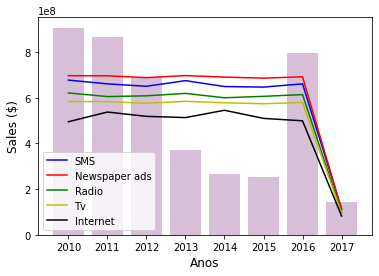

<Figure size 2880x2160 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x = sales_total.year , height = list(sales_total['SALES ($)']), color='thistle')
plt.plot(sales_total.year ,  list(sales_total['Advertising Expenses (SMS)']*3e4), color='b', label="SMS")
plt.plot(sales_total.year ,  list(sales_total['Advertising Expenses(Newspaper ads)']*1.5e5), color='r', label="Newspaper ads")
plt.plot(sales_total.year ,  list(sales_total['Advertising Expenses(Radio)']*1.9e4), color='g', label="Radio")
plt.plot(sales_total.year ,  list(sales_total['Advertising Expenses(TV)']*1.2e3), color='y', label="Tv")
plt.plot(sales_total.year ,  list(sales_total['Advertising Expenses(Internet)']*4.6e2), color='black', label="Internet")
plt.legend()
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.figure(figsize=(40,30))
plt.show()



In [ ]:
#Calculando o ROI dos canais de midia  calculo: receita(variavel resposta)-custo(variavel explicativa)*100/custo
#regressão linear 

temp['yearmonth'] = temp['date'].apply(lambda x: x.strftime('%Y%m') if pd.notnull(x)  else '')

roi = temp[['yearmonth','SALES ($)','Advertising Expenses (SMS)','Advertising Expenses(Newspaper ads)','Advertising Expenses(Radio)','Advertising Expenses(TV)','Advertising Expenses(Internet)']]

roi_total = roi.groupby('yearmonth')['SALES ($)','Advertising Expenses (SMS)','Advertising Expenses(Newspaper ads)','Advertising Expenses(Radio)','Advertising Expenses(TV)','Advertising Expenses(Internet)'].sum().reset_index()

roi_total = roi_total.round(2)

roi_total.head(8)


,yearmonth,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet)
0,201001,75906930.96,2295.05,413.60,3176.84,43547.76,58076.85
1,201002,99417293.64,1868.22,374.39,2556.58,39388.19,87816.53
2,201003,65713224.78,1683.11,386.20,2431.89,40275.14,125260.19
3,201004,70569781.38,1573.49,352.16,2596.87,36579.72,73059.34
4,201005,57464310.96,2269.24,413.87,3127.45,43706.40,79261.81
5,201006,62521566.66,1880.25,399.98,2524.41,41861.72,106823.05
6,201007,69071228.10,1493.28,359.73,2436.16,37487.87,118432.07
7,201008,68073880.14,1956.89,390.73,2912.24,40876.50,54983.70


In [ ]:
from sklearn.model_selection import train_test_split
#scikit

X=roi_total.drop(['SALES ($)'],axis=1)
y=roi_total['SALES ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=13)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
reg_linear = LinearRegression().fit(X_train, y_train)

In [ ]:
reg_linear.score(X_train,y_train)

0.24294338740990648

In [ ]:
y_pred_reg_lin = reg_linear.predict(X_test)

In [ ]:
print('MSE = ',mean_squared_error(y_test, y_pred_reg_lin), 'R2 = ',r2_score(y_test,y_pred_reg_lin))

MSE =  664730335335269.9 R2 =  -0.21275426716876544


In [ ]:
X2 = df_inv[df_inv['date']<='2011-01-01'][['Advertising Expenses (SMS)','Advertising Expenses(Newspaper ads)','Advertising Expenses(Radio)','Advertising Expenses(TV)','Advertising Expenses(Internet)']]
Y2 = df_inv[df_inv['date']<='2011-01-01']['SALES ($)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.10, random_state=13)

In [ ]:
reg_linear = LinearRegression().fit(X_train, y_train)
reg_linear.score(X_train,y_train)

0.047070397181370405

In [ ]:
y_pred_reg_lin = reg_linear.predict(X_test)

In [ ]:
print('MSE = ',mean_squared_error(y_test, y_pred_reg_lin), 'R2 = ',r2_score(y_test,y_pred_reg_lin))

MSE =  678810639452.2006 R2 =  -0.007953203968804612
